In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from math import pi, ceil
plt.style.use('seaborn')
sns.set_style("whitegrid")

import urllib.request
from nltk.tokenize import RegexpTokenizer

import re
import random
import numpy as np
import pandas as pd
import random
import math
import itertools
import multiprocessing
from tqdm import tqdm
import logging
import pickle

from scipy.sparse.linalg import svds,eigs
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances

import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.models.callbacks import CallbackAny2Vec
from scipy import stats

from time import time
import warnings
warnings.filterwarnings(action='ignore')

import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GIUCO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
track = pd.read_csv('tracks.csv')
track = pd.DataFrame(track)
print(track.shape)
track.head()

(3222, 22)


,Unnamed: 0,id,artist_name,track_name,album_name,artist_genre,release_date,artist_popularity,track_popularity,artist_followers,...,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,3nqQXoyQOWXiESFLlDF1hG,Sam Smith,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),"['dance pop', 'pop', 'uk pop']",2022-09-22,89,99,21138669,...,2,-7.375,0.0864,0.0130,0.000005,0.2660,0.238,131.121,156943,4
1,1,1Qrg8KqiBpW07V7PNxwwwL,SZA,Kill Bill,SOS,"['pop', 'r&b']",2022-12-08,94,86,9525089,...,8,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980,153947,4
2,2,1PckUlxKqWQs3RlWXVBLw3,Lizzo,About Damn Time,About Damn Time,"['dance pop', 'escape room', 'minnesota hip ho...",2022-04-14,79,85,5263886,...,10,-6.305,0.0656,0.0995,0.000000,0.3350,0.722,108.966,191822,4
3,3,4k6Uh1HXdhtusDW5y8Gbvy,Steve Lacy,Bad Habit,Gemini Rights,['afrofuturism'],2022-07-15,85,87,2694509,...,1,-7.093,0.0355,0.6130,0.000058,0.4020,0.700,168.946,232067,4
4,4,7jHi6opPq439ruUlfH90Aw,Metro Boomin,Creepin' (with The Weeknd & 21 Savage),HEROES & VILLAINS,['rap'],2022-12-02,92,74,3457729,...,1,-5.985,0.0474,0.4100,0.000000,0.0784,0.152,97.950,221520,4


In [3]:
df = pd.DataFrame(track)

# Consider this random sample as the playlist of certain user
user_play = df.sample(n=20)
user_play.shape

(20, 22)

In [4]:
user_play

,Unnamed: 0,id,artist_name,track_name,album_name,artist_genre,release_date,artist_popularity,track_popularity,artist_followers,...,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1176,1233,4OpmC94xXTITiYKfNJtHrb,Bring Me The Horizon,Throne,Throne,"['melodic metalcore', 'metalcore', 'rock', 'uk...",2015,78,0,4572882,...,0,-3.720,0.0987,0.000455,0.000000,0.3060,0.387,144.111,191520,4
2379,2574,59JiRvZPHTAfrIOjlf6viF,KISIDA KYODAN & THE AKEBOSI ROCKETS,GATE Ⅱ -Sekaiwo koete,GATE Ⅱ -Sekaiwo koete,"['anime', 'j-pixie', 'j-poprock', 'otacore']",2016-01-27,46,36,93602,...,1,-3.218,0.1220,0.000628,0.000064,0.0733,0.463,103.004,215875,4
377,401,3qOuySPLpVyBXLuTNMgbRj,The xx,On Hold - Jamie xx Remix,On Hold (Jamie xx Remix),"['downtempo', 'dream pop', 'indietronica']",2017-09-13,67,55,3841703,...,0,-7.850,0.0373,0.301000,0.844000,0.0998,0.471,128.188,371533,4
1318,1383,30VrBsh1STRBoIrhQOAwzK,Rihanna,Disturbia,Good Girl Gone Bad,"['barbadian pop', 'dance pop', 'pop', 'urban c...",2007-03-31,90,64,51659380,...,11,-4.517,0.0574,0.088400,0.000000,0.2190,0.717,124.904,238573,4
1143,1198,4jOtC832PyIXlCVPRElfQu,Olly Murs,Troublemaker (feat. Flo Rida),Right Place Right Time,"['dance pop', 'pop', 'pop dance', 'post-teen p...",2012-11-23,67,0,3267814,...,0,-3.689,0.0565,0.015000,0.000000,0.1250,0.965,106.008,185587,4
564,592,2wi0QZ8SagYzfSeAee6Rm4,Elkka,I Just Want To Love You,I Just Want To Love You,"['electra', 'electronica']",2022-09-20,43,52,14421,...,1,-8.436,0.0353,0.062500,0.737000,0.0860,0.306,134.000,230644,4
1151,1206,4CbKVDZkYKdv69I4bCaKUq,Skillet,Hero,Awake,"['alternative metal', 'christian alternative r...",2009-08-21,73,72,4406810,...,1,-2.543,0.0995,0.007910,0.000000,0.3360,0.782,142.018,186813,4
2717,2945,60ifqqPhbselSwXyGrGyMK,Deep Purple,Soldier Of Fortune - 2009 Digital Remaster,Stormbringer (Remastered),"['album rock', 'blues rock', 'classic rock', '...",1974-11,67,60,4807518,...,2,-13.007,0.0298,0.386000,0.000005,0.0868,0.225,133.615,204880,4
223,237,43PuMrRfbyyuz4QpZ3oAwN,Bryson Tiller,Exchange,T R A P S O U L,"['kentucky hip hop', 'pop', 'r&b', 'rap', 'trap']",2015-10-02,80,78,6333242,...,6,-10.598,0.1850,0.107000,0.000000,0.1350,0.276,160.108,194613,4
3124,3421,4OmfWzukSVD140NiAIEjem,Steve Lacy,Static,Gemini Rights,['afrofuturism'],2022-07-15,85,84,2694509,...,1,-12.661,0.0741,0.434000,0.631000,0.1010,0.215,79.001,156507,5


In [5]:
x_df = df[['danceability', 'energy', 'acousticness', 'valence', 'tempo']].values 
x_user = user_play[['danceability', 'energy','acousticness', 'valence', 'tempo']].values 
min_max_scaler = MinMaxScaler()
x_df_scaled = min_max_scaler.fit_transform(x_df)
x_user_scaled = min_max_scaler.fit_transform(x_user)

columns_scaled = ['danceability_scaled', 'energy_scaled', 'acousticness_scaled','valence_scaled', 'tempo_scaled']

df = pd.DataFrame(x_df_scaled, columns=columns_scaled)
user = pd.DataFrame(x_user_scaled, columns=columns_scaled)

In [6]:
n_clusters = range(2,21)
ssd = []
sc = []

for n in n_clusters:
    km = KMeans(n_clusters=n, max_iter=300, n_init=10, init='k-means++', random_state=42)
    km.fit(x_df_scaled)
    preds = km.predict(x_df_scaled) 
    centers = km.cluster_centers_ 
    ssd.append(km.inertia_) 
    score = silhouette_score(x_df_scaled, preds, metric='euclidean')
    sc.append(score)
    print("Number of Clusters = {}, Silhouette Score = {}".format(n, score))



Number of Clusters = 2, Silhouette Score = 0.44612840153752825
Number of Clusters = 3, Silhouette Score = 0.2846619588859838
Number of Clusters = 4, Silhouette Score = 0.2809960303615855
Number of Clusters = 5, Silhouette Score = 0.24102346398710897
Number of Clusters = 6, Silhouette Score = 0.2189026324577336
Number of Clusters = 7, Silhouette Score = 0.2229441988602831
Number of Clusters = 8, Silhouette Score = 0.20199587293501237
Number of Clusters = 9, Silhouette Score = 0.2051749843800004
Number of Clusters = 10, Silhouette Score = 0.2061010326852073
Number of Clusters = 11, Silhouette Score = 0.20486978955382013
Number of Clusters = 12, Silhouette Score = 0.2025211940986479
Number of Clusters = 13, Silhouette Score = 0.20047867094952623
Number of Clusters = 14, Silhouette Score = 0.1938797829251628
Number of Clusters = 15, Silhouette Score = 0.1897602486936832
Number of Clusters = 16, Silhouette Score = 0.18761311086244145
Number of Clusters = 17, Silhouette Score = 0.18797359246

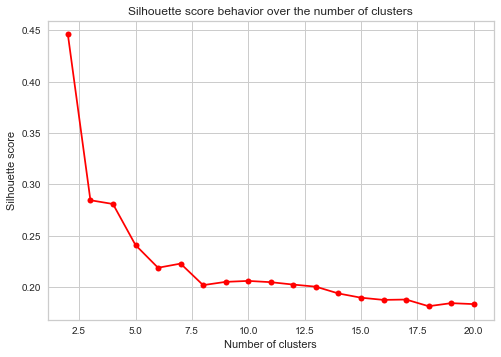

In [7]:
plt.plot(n_clusters, sc, marker='.', markersize=12, color='red')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score behavior over the number of clusters')
plt.show()


In [8]:
for n, s in zip(n_clusters, ssd):
    print('Number of Clusters = {}, Sum of Squared Distances = {}'.format(n, s))


Number of Clusters = 2, Sum of Squared Distances = 418.05457412237854
Number of Clusters = 3, Sum of Squared Distances = 309.9663464822342
Number of Clusters = 4, Sum of Squared Distances = 265.72495111880124
Number of Clusters = 5, Sum of Squared Distances = 233.18733512677994
Number of Clusters = 6, Sum of Squared Distances = 214.47774163556974
Number of Clusters = 7, Sum of Squared Distances = 198.11272886109438
Number of Clusters = 8, Sum of Squared Distances = 185.42513243302056
Number of Clusters = 9, Sum of Squared Distances = 174.4180854041267
Number of Clusters = 10, Sum of Squared Distances = 165.79141464721275
Number of Clusters = 11, Sum of Squared Distances = 158.8645647839757
Number of Clusters = 12, Sum of Squared Distances = 151.66485487054766
Number of Clusters = 13, Sum of Squared Distances = 146.06866837234716
Number of Clusters = 14, Sum of Squared Distances = 141.88169444097298
Number of Clusters = 15, Sum of Squared Distances = 137.60707189530515
Number of Cluster

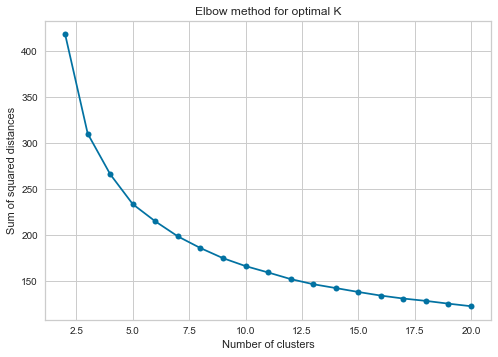

In [9]:
plt.plot(n_clusters, ssd, marker='.', markersize=12)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal K')
plt.show()


In [10]:
k=6
model = KMeans(n_clusters=k, random_state=42).fit(x_df_scaled)
pred = model.predict(x_df_scaled)
print('10 first clusters: ', model.labels_[:10])

10 first clusters:  [5 2 0 1 5 0 2 4 0 0]


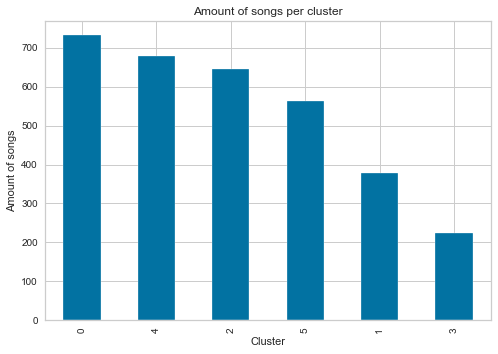

In [11]:

df['cluster'] = model.labels_

df['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount of songs')
plt.title('Amount of songs per cluster')
plt.show()


In [12]:
df_songs_joined = pd.concat([df,track], axis=1).set_index('cluster')

for cluster in range(k):
    display(df_songs_joined.loc[cluster, ['artist_name','track_name']].sample(frac=1).head(10))


,artist_name,track_name
cluster,,
0,Sak Noel,Loca People - Radio Edit
0,Sofia Carson,Love Is the Name
0,Ray Parker Jr.,Ghostbusters
0,Sorinel Pustiu,Vreau Sa-Mi Fac Statuie
0,TrySail,High Free Spirits
0,Boy Harsher,Pain
0,Bowling For Soup,Girl All the Bad Guys Want
0,PinkPantheress,Break it off
0,Alessio,Misco Misco


,artist_name,track_name
cluster,,
1,Alex Pustiu,Mi-E Pofta De Tine Rau
1,ECD,ミスターWICKED
1,Keisuke Kuwata,白い恋人達 [2022 Remaster]
1,A Boogie Wit da Hoodie,Look Back at It
1,Elliott Smith,Needle In The Hay
1,Hozier,Take Me To Church
1,Cheloo,O Zi Ca Oricare Alta
1,Ritt Momney,Set The Table (feat. Claud)
1,Queen,I'm Going Slightly Mad - Remastered 2011


,artist_name,track_name
cluster,,
2,3OH!3,DONTTRUSTME
2,Pop Smoke,Beat The Speaker
2,YSB Tril,Paralyzed
2,Avicii,Wake Me Up
2,Tones And I,Fly Away
2,Nate Ruess,Nothing Without Love
2,Jennifer Lopez,On The Floor
2,Chris Brown,Wet The Bed (feat. Ludacris)
2,Hermitude,"The Buzz (feat. Big K.R.I.T., Mataya & Young T..."


,artist_name,track_name
cluster,,
3,Disturbed,The Sound of Silence
3,Clairo,Bubble Gum
3,Adele,Easy On Me
3,j'san,"i'm in love with u, sorry"
3,Leonid Antonov,Atwined
3,Doris Melwin,Conversant
3,Mundo Suave,Perfection
3,Wolfgang Amadeus Mozart,Lacrimosa
3,Danny L Harle,Ocean's Theme


,artist_name,track_name
cluster,,
4,Soundgarden,Black Hole Sun
4,Arca,Señorita
4,Don Toliver,After Party
4,Skrillex,Scary Monsters and Nice Sprites
4,The Neighbourhood,Stuck with Me
4,Husky by the Geek,"Title Theme (From ""Mega Man 3"")"
4,Amy Shark,I Said Hi
4,Slipknot,Custer
4,Tame Impala,"New Person, Same Old Mistakes"


,artist_name,track_name
cluster,,
5,Kygo,Woke Up in Love
5,PARTYNEXTDOOR,Come and See Me (feat. Drake)
5,Chris Brown,No Guidance (feat. Drake)
5,Amir Obe,CIGARETTES
5,Drake,One Dance
5,Stephen Dawes,Teenage Dream
5,Guns N' Roses,Don't Cry (Original)
5,Surfaces,Wave of You
5,Coldplay,Viva La Vida


In [13]:

df_radar = df.groupby('cluster').mean().reset_index()
df_radar

,cluster,danceability_scaled,energy_scaled,acousticness_scaled,valence_scaled,tempo_scaled
0,0,0.298672,0.827591,0.103499,0.814697,0.604719
1,1,0.282524,0.538902,0.588220,0.511135,0.529092
2,2,0.282859,0.656158,0.103820,0.584548,0.539690
3,3,0.265905,0.146729,0.885866,0.151532,0.467224
4,4,0.328216,0.886262,0.031473,0.398962,0.604549
5,5,0.319799,0.565406,0.122776,0.254296,0.568561


In [14]:
def make_radar(row, title, color, dframe, num_clusters):
    # number of variable
    categories=list(dframe)[1:]
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the radar plot
    #ax = plt.subplot(4,ceil(num_clusters/4),row+1, polar=True, )
    ax = plt.subplot(2,ceil(num_clusters/2),row+1, polar=True, )
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=14)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=8)
    plt.ylim(0,1)

    # Ind1
    values=dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color=color, y=1.06)



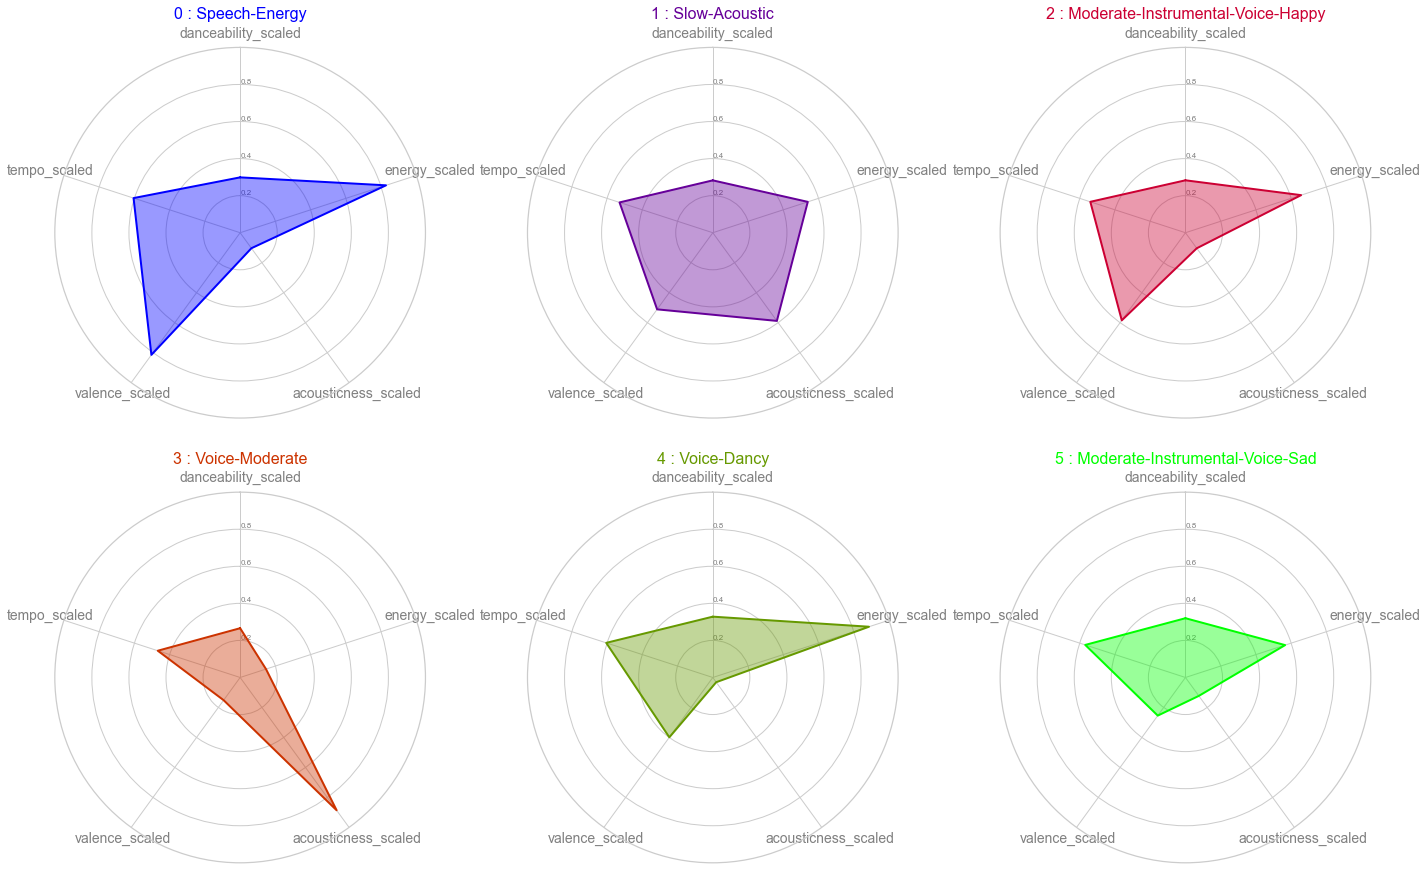

In [15]:
# initialize the figure
plt.figure(figsize=(24,15))
 
# Create a color palette:
my_palette = plt.cm.get_cmap("brg", len(df_radar.index))

# Create cluster name
title_list = ['Speech-Energy', 'Slow-Acoustic', 'Moderate-Instrumental-Voice-Happy', 'Voice-Moderate', 
              'Voice-Dancy', 'Moderate-Instrumental-Voice-Sad']

# Loop to plot
for row in range(0, len(df_radar.index)):
    make_radar(row=row, title=str(df_radar['cluster'][row]) + ' : ' + title_list[row], 
               color=my_palette(row), dframe=df_radar, num_clusters=len(df_radar.index))


0.8862950469311235


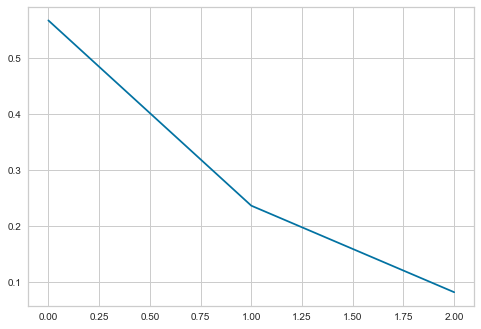

In [16]:
pca = PCA(n_components=3, random_state=42)
songs_pca = pca.fit_transform(x_df_scaled)
print(pca.explained_variance_ratio_.sum())
plt.plot(pca.explained_variance_ratio_)

In [17]:
df_pca = pd.DataFrame(songs_pca, columns=['C1', 'C2', 'C3'])
df_pca['cluster'] = model.labels_
minor_cluster = df['cluster'].value_counts().tail(1)
sampled_clusters_pca = pd.DataFrame()

for c in df_pca.cluster.unique():
    df_cluster_sampled_pca = df_pca[df_pca.cluster == c].sample(n=int(minor_cluster), random_state=42)
    sampled_clusters_pca = pd.concat([sampled_clusters_pca,df_cluster_sampled_pca], axis=0)
sampled_clusters_pca.cluster.value_counts()

5    223
2    223
0    223
1    223
4    223
3    223
Name: cluster, dtype: int64

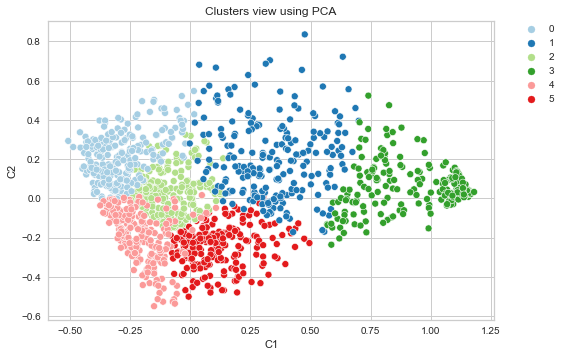

In [18]:
sns.scatterplot(x='C1', y='C2', hue='cluster', data=sampled_clusters_pca, legend="full", palette='Paired')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using PCA')
plt.show()


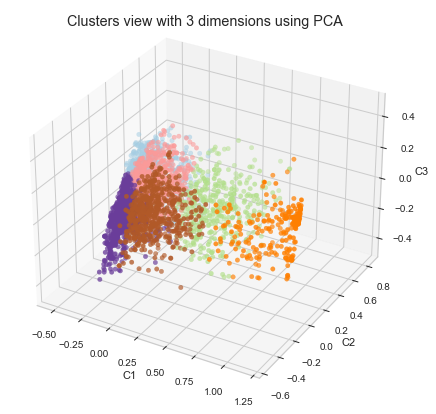

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Clusters view with 3 dimensions using PCA')
ax = Axes3D(fig)

ax.scatter(df_pca['C1'], df_pca['C2'], df_pca['C3'],
           c=df_pca['cluster'], cmap='Paired')

ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_zlabel('C3')
plt.show()


In [20]:
user_pred = model.predict(x_user_scaled)
print('User Playlist clusters: ', user_pred)


User Playlist clusters:  [4 4 1 2 0 5 0 3 5 3 4 2 5 4 1 1 0 2 0 2]


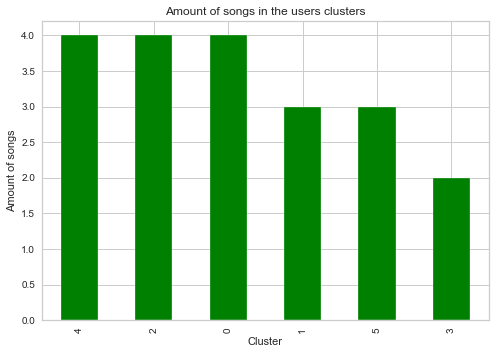

In [21]:
user_cluster = pd.DataFrame(x_user_scaled, columns=columns_scaled)
user_cluster['cluster'] = user_pred

user_cluster['cluster'].value_counts().plot(kind='bar', color='green')
plt.xlabel('Cluster')
plt.ylabel('Amount of songs')
plt.title('Amount of songs in the users clusters')
plt.show()


In [22]:
user_play_r = user_play.reset_index(drop=True)
df_user_songs_joined = pd.concat([user_cluster,user_play_r], axis=1).set_index('cluster')
for cluster in user_cluster['cluster'].unique():
    display(df_user_songs_joined.loc[cluster, ['artist_name','track_name']].sample(frac=1))


,artist_name,track_name
cluster,,
4,KISIDA KYODAN & THE AKEBOSI ROCKETS,GATE Ⅱ -Sekaiwo koete
4,Bring Me The Horizon,Throne
4,Maxim,Sarutari criminale
4,Nas,"One Mic, One Gun"


,artist_name,track_name
cluster,,
1,The xx,On Hold - Jamie xx Remix
1,Cliff Richard,Saviour's Day
1,Hailey Whitters,Everything She Ain’t


,artist_name,track_name
cluster,,
2,Eminem,Without Me
2,Rihanna,Disturbia
2,Surf Curse,Disco
2,Ramirez,Na Na Na Na Na (Caught Slippin)


,artist_name,track_name
cluster,,
0,Her's,Speed Racer
0,Olly Murs,Troublemaker (feat. Flo Rida)
0,Florin Salam,"Cuba, Cuba"
0,Skillet,Hero


,artist_name,track_name
cluster,,
5,Elkka,I Just Want To Love You
5,Bryson Tiller,Exchange
5,Bruno Mars,Grenade


,artist_name,track_name
cluster,,
3,Steve Lacy,Static
3,Deep Purple,Soldier Of Fortune - 2009 Digital Remaster


In [23]:
df_user_songs_joined.reset_index(inplace=True)
cluster_pct = df_user_songs_joined.cluster.value_counts(normalize=True)*20

if int(cluster_pct.round(0).sum()) < 20:
    cluster_pct[cluster_pct < 0.5] = cluster_pct[cluster_pct < 0.5] + 1.0
    
display(cluster_pct)

4    4.0
2    4.0
0    4.0
1    3.0
5    3.0
3    2.0
Name: cluster, dtype: float64

In [24]:
df_user_songs_joined['cluster_pct'] = df_user_songs_joined['cluster'].apply(lambda c: cluster_pct[c])
df_user_songs_joined.drop(columns=columns_scaled, inplace=True)
df_user_songs_joined.head(3)


,cluster,Unnamed: 0,id,artist_name,track_name,album_name,artist_genre,release_date,artist_popularity,track_popularity,...,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_pct
0,4,1233,4OpmC94xXTITiYKfNJtHrb,Bring Me The Horizon,Throne,Throne,"['melodic metalcore', 'metalcore', 'rock', 'uk...",2015,78,0,...,-3.720,0.0987,0.000455,0.000000,0.3060,0.387,144.111,191520,4,4.0
1,4,2574,59JiRvZPHTAfrIOjlf6viF,KISIDA KYODAN & THE AKEBOSI ROCKETS,GATE Ⅱ -Sekaiwo koete,GATE Ⅱ -Sekaiwo koete,"['anime', 'j-pixie', 'j-poprock', 'otacore']",2016-01-27,46,36,...,-3.218,0.1220,0.000628,0.000064,0.0733,0.463,103.004,215875,4,4.0
2,1,401,3qOuySPLpVyBXLuTNMgbRj,The xx,On Hold - Jamie xx Remix,On Hold (Jamie xx Remix),"['downtempo', 'dream pop', 'indietronica']",2017-09-13,67,55,...,-7.850,0.0373,0.301000,0.844000,0.0998,0.471,128.188,371533,4,3.0


In [25]:
df.isnull().sum()


danceability_scaled    0
energy_scaled          0
acousticness_scaled    0
valence_scaled         0
tempo_scaled           0
cluster                0
dtype: int64

In [26]:
df_songs_joined = df_songs_joined.reset_index(drop=False)
playlist = pd.DataFrame()

for ncluster, pct in cluster_pct.items():
    songs = df_songs_joined[df_songs_joined['cluster'] == ncluster].sample(n=int(round(pct, 0)))
    playlist = pd.concat([playlist,songs], ignore_index=True)
    if len(playlist) > 20 :
        flag = 20 - len(playlist)
        playlist = playlist[:flag]
playlist[['artist_name', 'track_name', 'cluster']]


,artist_name,track_name,cluster
0,KEYTALK,MATSURI BAYASHI,4
1,DeJ Loaf,Changes,4
2,Dan Bittman,Si ingerii au demonii lor,4
3,George FitzGerald,Setting Sun,4
4,Harleckinz,Things Thats Forever...,2
5,J. Cole,No Role Modelz,2
6,Scorpions,The Best Is Yet to Come,2
7,Jhené Aiko,Sativa,2
8,Bee Gees,Stayin Alive,0
9,Nicky Youre,Sunroof,0


In [27]:
user_play[['artist_name', 'track_name']]


,artist_name,track_name
1176,Bring Me The Horizon,Throne
2379,KISIDA KYODAN & THE AKEBOSI ROCKETS,GATE Ⅱ -Sekaiwo koete
377,The xx,On Hold - Jamie xx Remix
1318,Rihanna,Disturbia
1143,Olly Murs,Troublemaker (feat. Flo Rida)
564,Elkka,I Just Want To Love You
1151,Skillet,Hero
2717,Deep Purple,Soldier Of Fortune - 2009 Digital Remaster
223,Bryson Tiller,Exchange
3124,Steve Lacy,Static
